In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("../Data/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
x=df.drop(columns="Outcome")
y=df["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel="rbf",C=1)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy of model is : 0.7922077922077922


<AxesSubplot:>

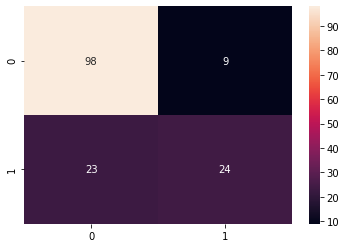

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
acc=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print("Accuracy of model is :",acc)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



## Tuning Hyperparameter

In [ ]:
help(SVC) #fuct,class 


    kernels in [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’]

If the polynomial kernel works out, then it is a good idea to dive into the degree hyperparameter.

Another critical parameter is the penalty (C) that can take on a range of values and has a dramatic effect on the shape of the resulting regions for each class. A log scale might be a good starting point.

    C in [100, 10, 1.0, 0.1, 0.001]


In [ ]:
# tuning of svm Hyperparameter
#model
model=SVC()

#paramters
kernel=['linear', 'poly', 'rbf', 'sigmoid']
C=[100,50,10,1,0.1,0.01]
gamma=['scale']

#grid
grid={"kernel":kernel,"C":C,"gamma":gamma}

#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)

#gridsearch cv
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring='accuracy',n_jobs=1)

#result
res=grid_cv.fit(xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)